It was decided that for a version to be considered superior, a minimum increase in click-through rate of **30%** had to be detected.

The hypotheses to be tested in the experiment are the following:

**Null Hypothesis:** all variants have the same CTR. </br>
**Alternative Hypothesis:** there is a difference in the CTR for the different variants.
The desired Statistical Significance was chosen to be **90%**
</br>
Using https://www.abtasty.com/sample-size-calculator/ with the parameters 


*   Conversion Rate: 2%
*   Minimum Detectable Effect: 30%
*   Statistical Significance: 90%
*   Average Daily Visitors: 1650
*   Number of Variations: 5
The length of the experiment was calculate 21 days

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

Explore the data and tackle these questions:

What was the click-through rate for each version? </br>
Which version was the winner? </br>
Do the results seem conclusive? 

In [ ]:
interact = pd.read_csv("https://raw.githubusercontent.com/icaromisquita/archives/main/Element%20list%20Homepage%20Version%201%20-%20Interact%2C%205-29-2013.csv")
connect = pd.read_csv("https://raw.githubusercontent.com/icaromisquita/archives/main/Element%20list%20Homepage%20Version%202%20-%20Connect%2C%205-29-2013.csv")
learn = pd.read_csv("https://raw.githubusercontent.com/icaromisquita/archives/main/Element%20list%20Homepage%20Version%203%20-%20Learn%2C%205-29-2013.csv")
help = pd.read_csv("https://raw.githubusercontent.com/icaromisquita/archives/main/Element%20list%20Homepage%20Version%204%20-%20Help%2C%205-29-2013.csv")
service = pd.read_csv("https://raw.githubusercontent.com/icaromisquita/archives/main/Element%20list%20Homepage%20Version%205%20-%20Services%2C%205-29-2013.csv")

In [ ]:
interact.head()

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,128,area,Montana State University - Home,1291,False,Homepage Version 1 - Interact • http://www...
1,69,a,FIND,842,True,created 5-29-2013 • 20 days 4 hours 21 min...
2,61,input,s.q,508,True,NaN
3,67,a,lib.montana.edu/find/,166,True,NaN
4,78,a,REQUEST,151,True,NaN


In [ ]:
connect.head()

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,74,a,FIND,502,True,Homepage Version 2 - Connect • http://www....
1,66,input,s.q,357,True,created 5-29-2013 • 20 days 7 hours 34 min...
2,72,a,lib.montana.edu/find/,171,True,NaN
3,133,area,Montana State University Libraries - Home,83,False,NaN
4,103,a,Hours,74,True,NaN


In [ ]:
learn.head()

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,69,a,FIND,587,True,Homepage Version 3 - Learn • http://www.li...
1,61,input,s.q,325,True,created 5-29-2013 • 20 days 12 hours 21 mi...
2,67,a,lib.montana.edu/find/,142,True,NaN
3,128,area,Montana State University - Home,83,False,NaN
4,98,a,Hours,76,True,NaN


In [ ]:
help.head()

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,74,a,FIND,631,True,Homepage Version 4 - Help • http://www.lib...
1,66,input,s.q,364,True,created 5-29-2013 • 20 days 4 hours 59 min...
2,72,a,lib.montana.edu/find/,139,True,NaN
3,133,area,Montana State University - Home,122,False,NaN
4,83,a,REQUEST,72,True,NaN


In [ ]:
service.head()

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,69,a,FIND,397,True,Homepage Version 5 - Services • http://www...
1,61,input,s.q,323,True,created 5-29-2013 • 20 days 4 hours 59 min...
2,67,a,lib.montana.edu/find/,106,True,NaN
3,62,button,Search,85,True,NaN
4,98,a,Hours,81,True,NaN


Finding the number of clicks for each dataset

In [ ]:
interact.loc[interact["Name"]=="INTERACT"].get(["Name","No. clicks"])

,Name,No. clicks
9,INTERACT,42


In [ ]:
connect.loc[connect["Name"]=="CONNECT"].get(["Name","No. clicks"])

,Name,No. clicks
6,CONNECT,53


In [ ]:
learn.loc[learn["Name"]=="LEARN"].get(["Name","No. clicks"])

,Name,No. clicks
10,LEARN,21


In [ ]:
help.loc[help["Name"]=="HELP"].get(["Name","No. clicks"])

,Name,No. clicks
7,HELP,38


In [ ]:
service.loc[service["Name"]=="SERVICES"].get(["Name","No. clicks"])

,Name,No. clicks
7,SERVICES,45


Obtaining the total of visitors *minus* number of clicks, this is the number of non-clicks on a particular value


Reading the dataset, the total number of clicks is:
*   Interact = 10283
*   Connect = 2742
*   Learn = 2747
*   Help = 3180
*   Services = 2064








In [ ]:
interact_nonclicks = 10283 - 42
connect_nonclicks = 2742 - 53
learn_nonclicks = 2747 - 21
help_nonclicks = 3180 - 38
service_nonclicks = 2064 - 45

contigency_table = pd.DataFrame({ "clicks" : [42, 53, 21, 38, 45],
                                "nonclicks" : [interact_nonclicks, connect_nonclicks, learn_nonclicks, help_nonclicks, service_nonclicks]},
                                 index = ["Interact", "Connect", "Learn", "Help", "Services"])    

                                
contigency_table = contigency_table.transpose()
contigency_table

,Interact,Connect,Learn,Help,Services
clicks,42,53,21,38,45
nonclicks,10241,2689,2726,3142,2019


In [ ]:
contigency_table.dtypes

Interact    int64
Connect     int64
Learn       int64
Help        int64
Services    int64
dtype: object

<font color='red'> What was the click-through rate for each version? </font>
> Calculating the rates

In [ ]:
rates_table = pd.DataFrame( { "names" : ["Interact", "Connect", "Learn", "Help", "Services"],
                              "rates" : [42/10283, 53/2742, 21/2747, 38/3180, 45/2064]   
})
rates_table

,names,rates
0,Interact,0.004084
1,Connect,0.019329
2,Learn,0.007645
3,Help,0.011950
4,Services,0.021802


In [ ]:
from scipy import stats
chisq, pvalue, df, expected = stats.chi2_contingency(contigency_table)

In [ ]:
chisq

96.7432353798328

In [ ]:
pvalue

4.852334301093838e-20

In [ ]:
df

4

In [ ]:
expected

array([[   97.3694804 ,    25.96393224,    26.01127712,    30.11134374,
           19.5439665 ],
       [10185.6305196 ,  2716.03606776,  2720.98872288,  3149.88865626,
         2044.4560335 ]])

In [ ]:
pvalue_deter = 1 - 0.9
round(pvalue_deter,1)

0.1

If the p-value is smaller than our significance level, it will mean that we can reject the Null Hypothesis the variation on the button has produced a statistically detetable difference.


In [ ]:
def null_hypothesis_test(pvalue, pvalue_deter):
  if pvalue < pvalue_deter:
     print("Rejects the Null Hypothesis")
  else:
    print("Don't rejects the Null Hypothesis")

In [ ]:
null_hypothesis_test(pvalue, pvalue_deter)

Rejects the Null Hypothesis


Repeats the test removing the less clicked value. Until we're left with just one value.

> Removing the Interact

In [ ]:
contigency_table_iter_1 = pd.DataFrame({ "clicks" : [53, 21, 38, 45],
                                         "nonclicks" : [connect_nonclicks, learn_nonclicks, help_nonclicks, service_nonclicks]},
                                          index = [ "Connect", "Learn", "Help", "Services"])    

                                
contigency_table_iter_1 = contigency_table_iter_1.transpose()
contigency_table_iter_1

,Connect,Learn,Help,Services
clicks,53,21,38,45
nonclicks,2689,2726,3142,2019


In [ ]:
chisq_iter1, pvalue_iter1, df_iter1, expected_iter1 = stats.chi2_contingency(contigency_table_iter_1)


In [ ]:
null_hypothesis_test(pvalue_iter1, pvalue_deter)

Rejects the Null Hypothesis




> Removing the Learn



In [ ]:
contigency_table_iter_2 = pd.DataFrame({ "clicks" : [53, 38, 45],
                                         "nonclicks" : [connect_nonclicks, help_nonclicks, service_nonclicks]},
                                          index = [ "Connect", "Help", "Services"])    

                                
contigency_table_iter_2 = contigency_table_iter_2.transpose()
contigency_table_iter_2

,Connect,Help,Services
clicks,53,38,45
nonclicks,2689,3142,2019


In [ ]:
chisq_iter2, pvalue_iter2, df_iter2, expected_iter2 = stats.chi2_contingency(contigency_table_iter_2)


In [ ]:
null_hypothesis_test(pvalue_iter2, pvalue_deter)

Rejects the Null Hypothesis




> Removing the Help



In [ ]:
contigency_table_iter_3 = pd.DataFrame({ "clicks" : [53, 45],
                                         "nonclicks" : [connect_nonclicks, service_nonclicks]},
                                          index = [ "Connect", "Services"])    

                                
contigency_table_iter_3 = contigency_table_iter_3.transpose()
contigency_table_iter_3

,Connect,Services
clicks,53,45
nonclicks,2689,2019


In [ ]:
chisq_iter3, pvalue_iter3, df_iter3, expected_iter3 = stats.chi2_contingency(contigency_table_iter_3)


In [ ]:
null_hypothesis_test(pvalue_iter3, pvalue_deter)

Don't rejects the Null Hypothesis


**We don't Reject the Null Hypothesis**, it means that there are no statistical difference between the variables, in this case no difference in the performances of ***Connect*** or ***Services*** button.

###<font color='red'> Which version was the winner? </font>

In the end of the Chi-Square Test we have two options. To choose the final version we will make the decision based on others criterias. </br> 
In this case, the website team decided to track drop-off rate and homepage-return rate as well. 



For this decision the graph for **Drop-off Rate** and **Homepage-return Rate** were provided.

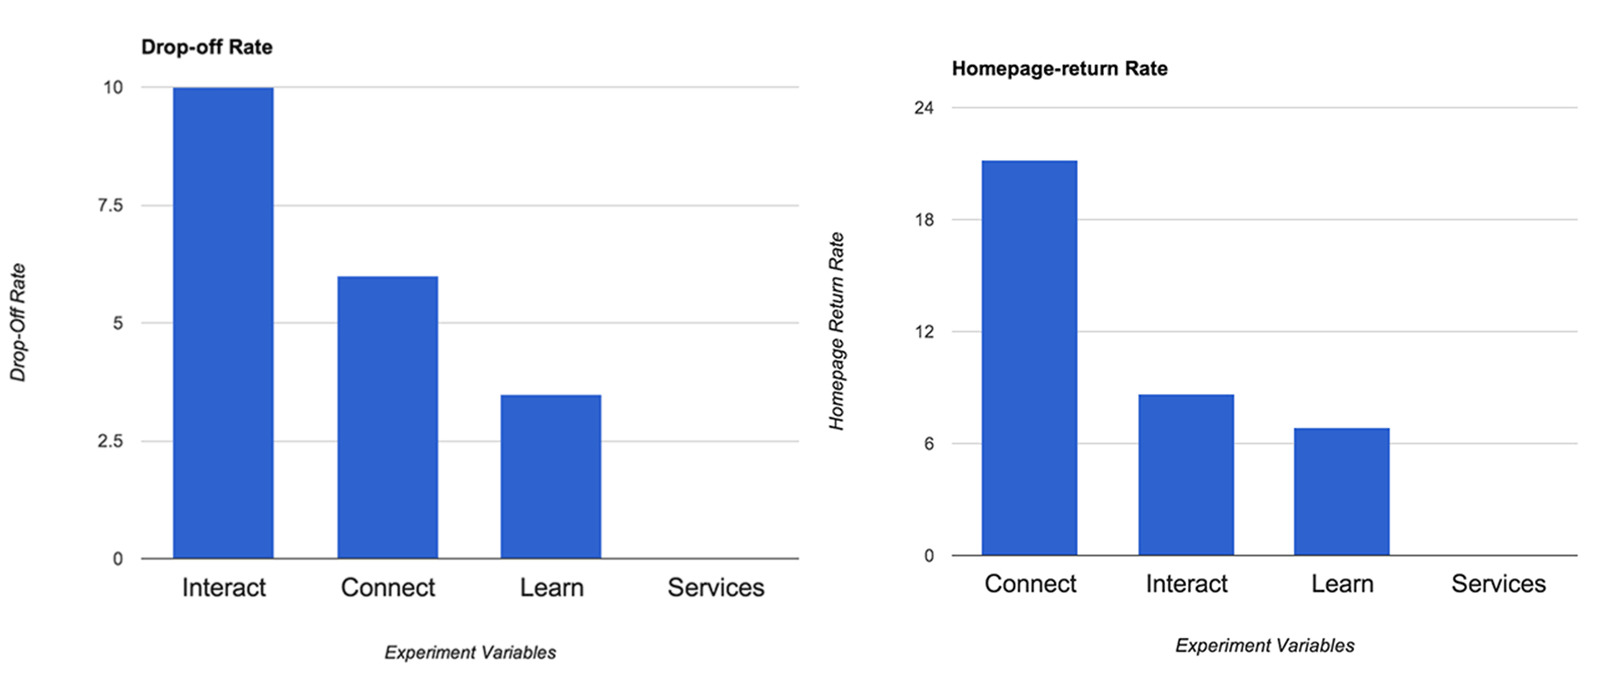

###<font color='red'> With the result of your chi-square tests and these additional data: which version is your winner? </font>

Observing the graphs, was noticed that no data was obtained for the **Services** variable for both **Drop-off Rate** and **Homepage-return Rate**. </br>
As we have data for the **Connnect** button and with the Chi-Square test concluded that no statistically significant difference were observed between **Connect** and **Services**, the **Connect** version was chosen as the winner, since for the additional parameters **Drop-off Rate** and **Homepage-return Rate** it perfomed well and it's concurrent, **Services**, had no available data.  




##<font color='red'> Conclusion: The **Connect** version is the winner and should be implemented in the Montana Library Website. </font>